In [31]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import matplotlib as mpl

#Reading the dataset
df=pd.read_csv('WineQT.csv')

In [10]:
#Find Mean, median, Mode, Standard deviation
mean_values = df.mean()
median_values = df.median()
mode_values = df.mode().iloc[0]  #Get the first mode for each column
std_dev_values = df.std()

#Display the answers
print("Mean Values:\n", mean_values)
print("\nMedian Values:\n", median_values)
print("\nMode Values:\n", mode_values)
print("\nStandard Deviation Values:\n", std_dev_values)

Mean Values:
 fixed acidity             8.311111
volatile acidity          0.531339
citric acid               0.268364
residual sugar            2.532152
chlorides                 0.086933
free sulfur dioxide      15.615486
total sulfur dioxide     45.914698
density                   0.996730
pH                        3.311015
sulphates                 0.657708
alcohol                  10.442111
quality                   5.657043
Id                      804.969379
dtype: float64

Median Values:
 fixed acidity             7.90000
volatile acidity          0.52000
citric acid               0.25000
residual sugar            2.20000
chlorides                 0.07900
free sulfur dioxide      13.00000
total sulfur dioxide     37.00000
density                   0.99668
pH                        3.31000
sulphates                 0.62000
alcohol                  10.20000
quality                   6.00000
Id                      794.00000
dtype: float64

Mode Values:
 fixed acidity            7.

In [44]:
#Calculate sample statistics
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)  # Use ddof=1 for sample standard deviation

#Set confidence interval
confidence_level = 0.95
degrees_freedom = len(data) - 1

#Calculate critical value
critical_value = stats.t.ppf((1 + confidence_level) / 2, degrees_freedom)

#Calculate Standard error, Margin of error, Confidence interval
standard_error = sample_std / np.sqrt(len(data))
margin_of_error = critical_value * standard_error
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

#Display the results
print(f"Sample Mean: {sample_mean}")
print(f"Standard Error: {standard_error}")
print(f"Margin of Error: {margin_of_error}")
print(f"Confidence Interval ({confidence_level*100}%): {confidence_interval}")

Sample Mean: 69.17646680081657
Standard Error: 7.359019574825518
Margin of Error: 14.438716124121246
Confidence Interval (95.0%): (54.73775067669533, 83.61518292493781)


In [43]:
#Hypothesis Testing
hypothesized_mean = 10

if confidence_interval[0] <= hypothesized_mean <= confidence_interval[1]:
    print(f"Fail to reject the null hypothesis (H0). The population mean is likely to be {hypothesized_mean}.")
else:
    print(f"Reject the null hypothesis (H0). The population mean is not likely to be {hypothesized_mean}.")

Reject the null hypothesis (H0). The population mean is not likely to be 10.


In [15]:
#Set plot style
sns.set(style="whitegrid")

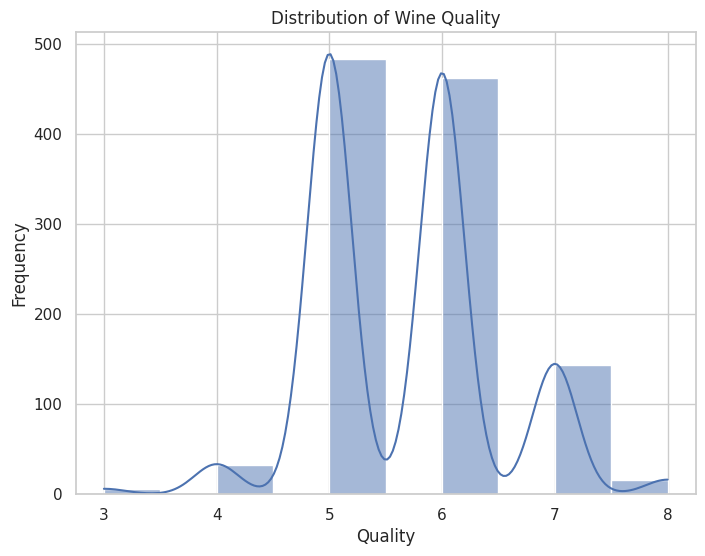

In [16]:
#Histogram of wine quality
plt.figure(figsize=(8, 6))
sns.histplot(df['quality'], bins=10, kde=True)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

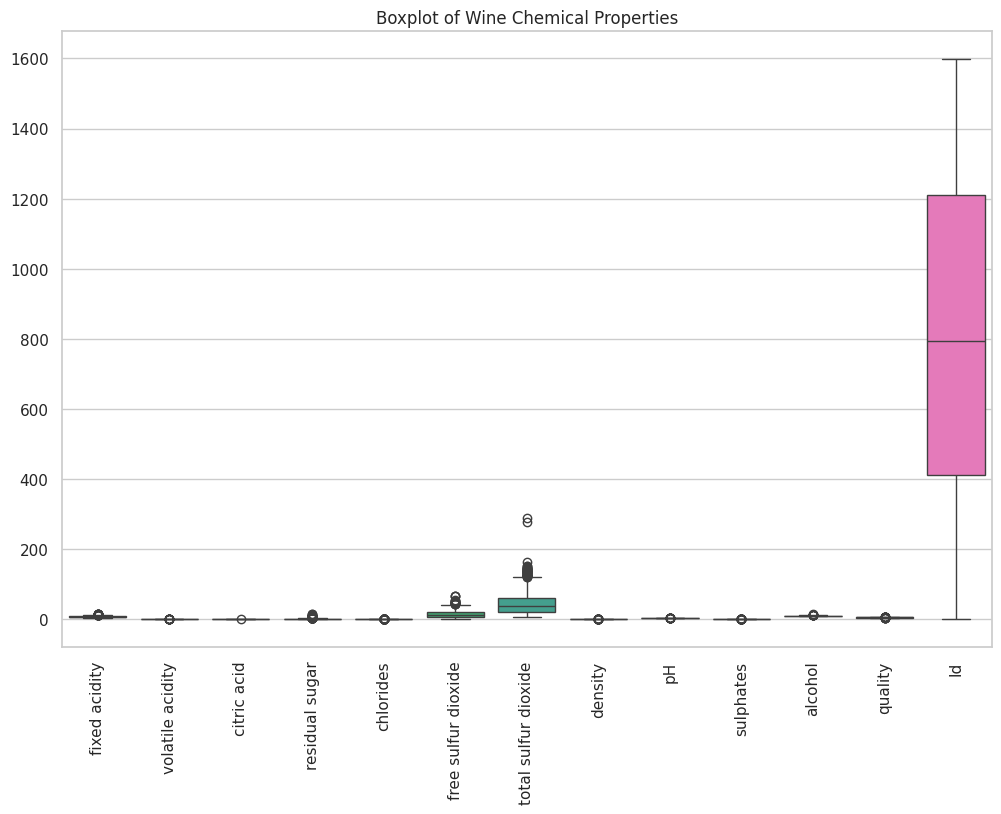

In [17]:
#Boxplot of Each Feature to Detect Outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Boxplot of Wine Chemical Properties')
plt.xticks(rotation=90)
plt.show()

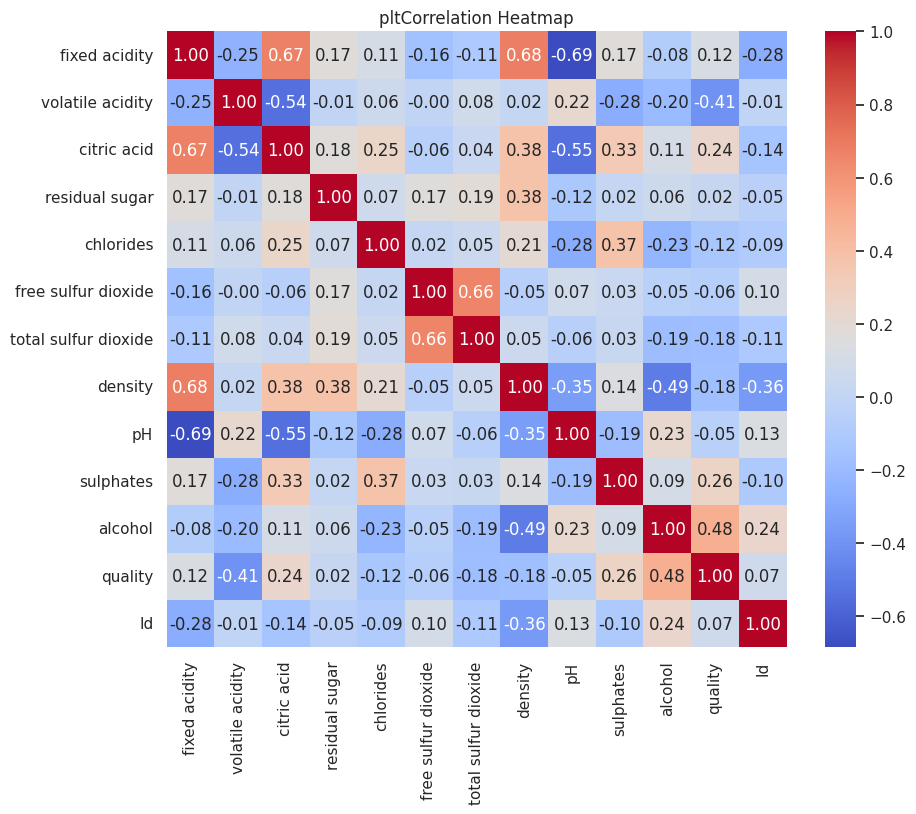

In [18]:
#Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('pltCorrelation Heatmap')
plt.show()

<Figure size 1000x1000 with 0 Axes>

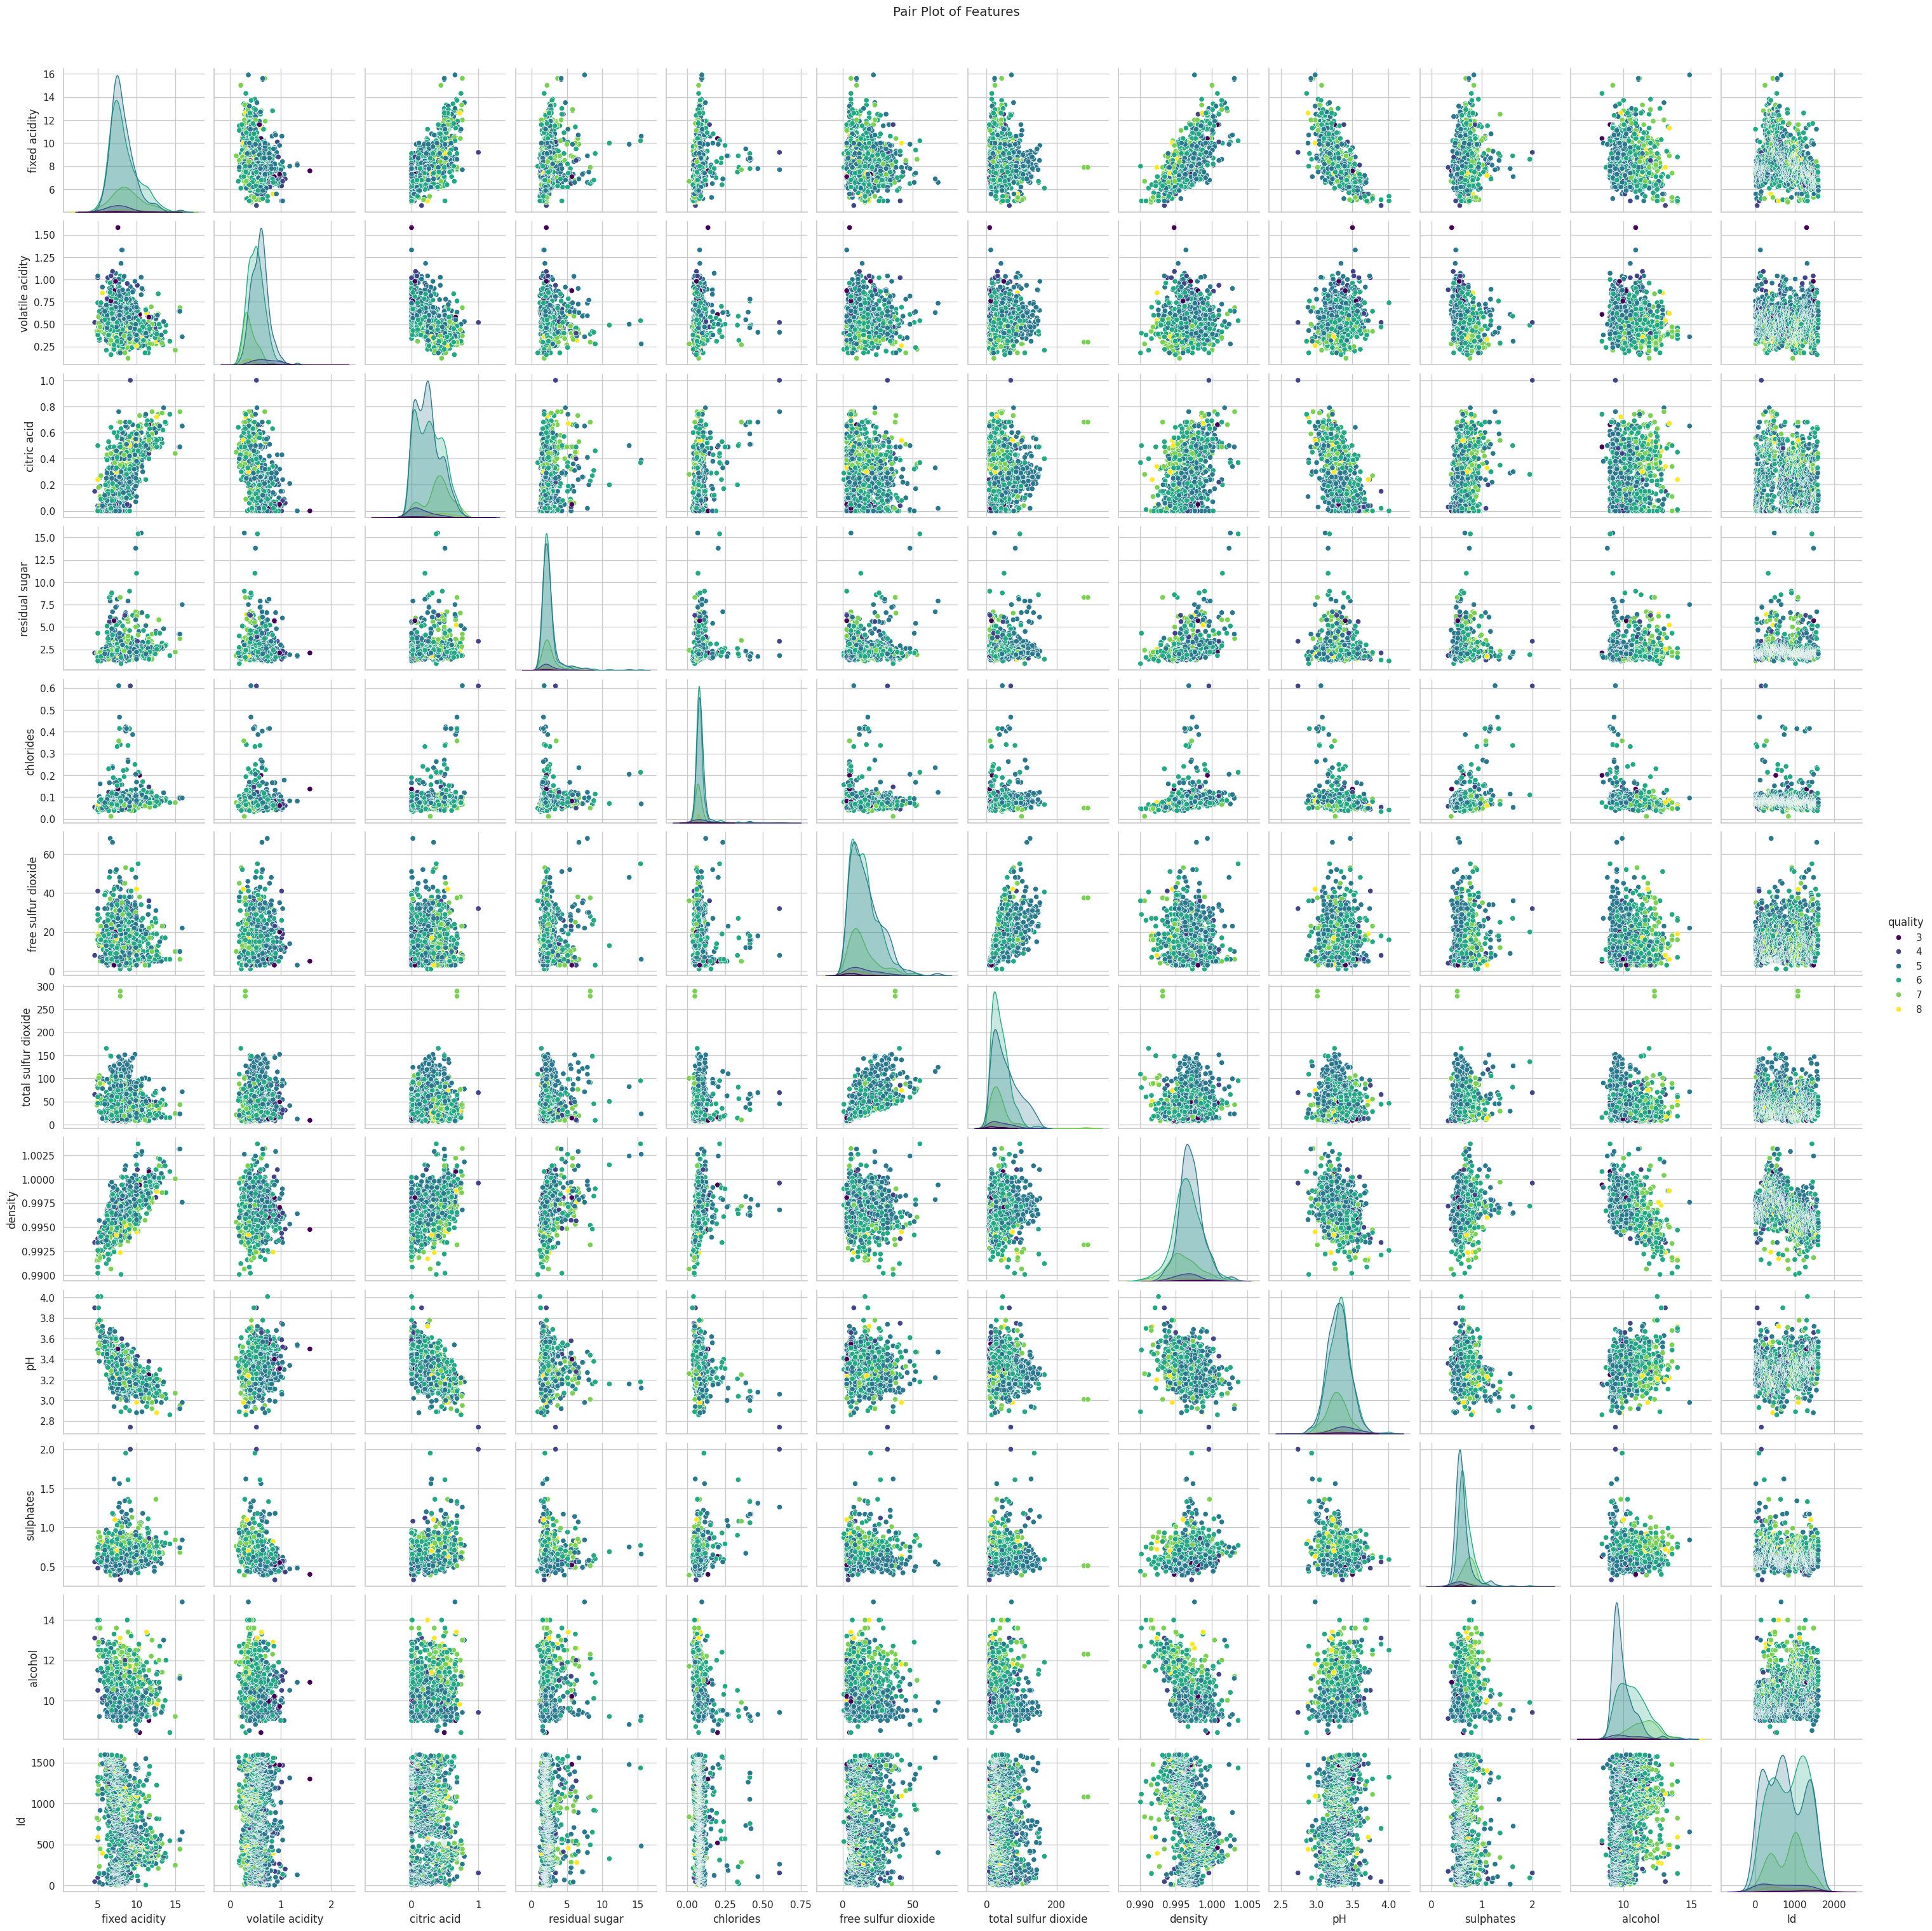

In [19]:
#Pair Plot to See Relationships Between Variables and Quality
plt.figure(figsize=(10, 10))
sns.pairplot(df, hue="quality", diag_kind="kde", palette="viridis")
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

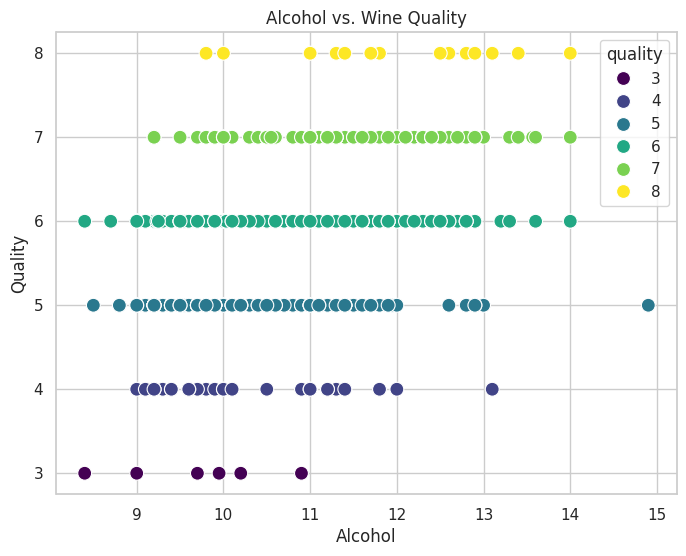

In [14]:
#Scatter Plot of Alcohol vs. Quality
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='alcohol', y='quality', hue='quality', palette='viridis', s=100)
plt.title('Alcohol vs. Wine Quality')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.show()

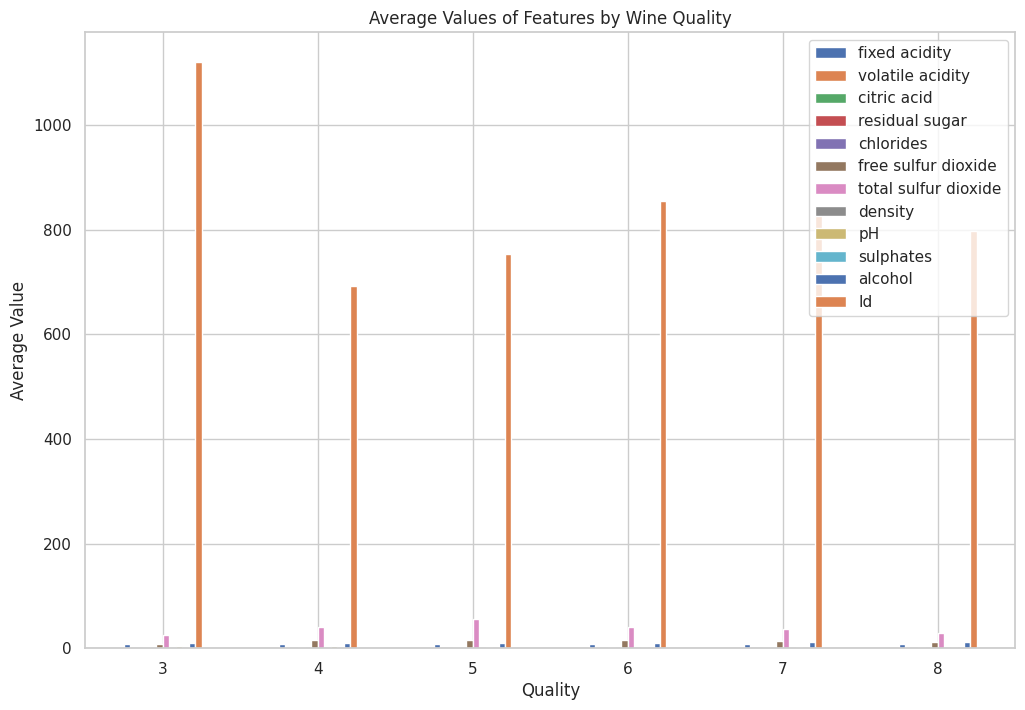

In [20]:
#Bar Plot of Average Values for Each Feature Grouped by Quality
mean_values_by_quality = df.groupby('quality').mean()
mean_values_by_quality.plot(kind='bar', figsize=(12, 8))
plt.title('Average Values of Features by Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

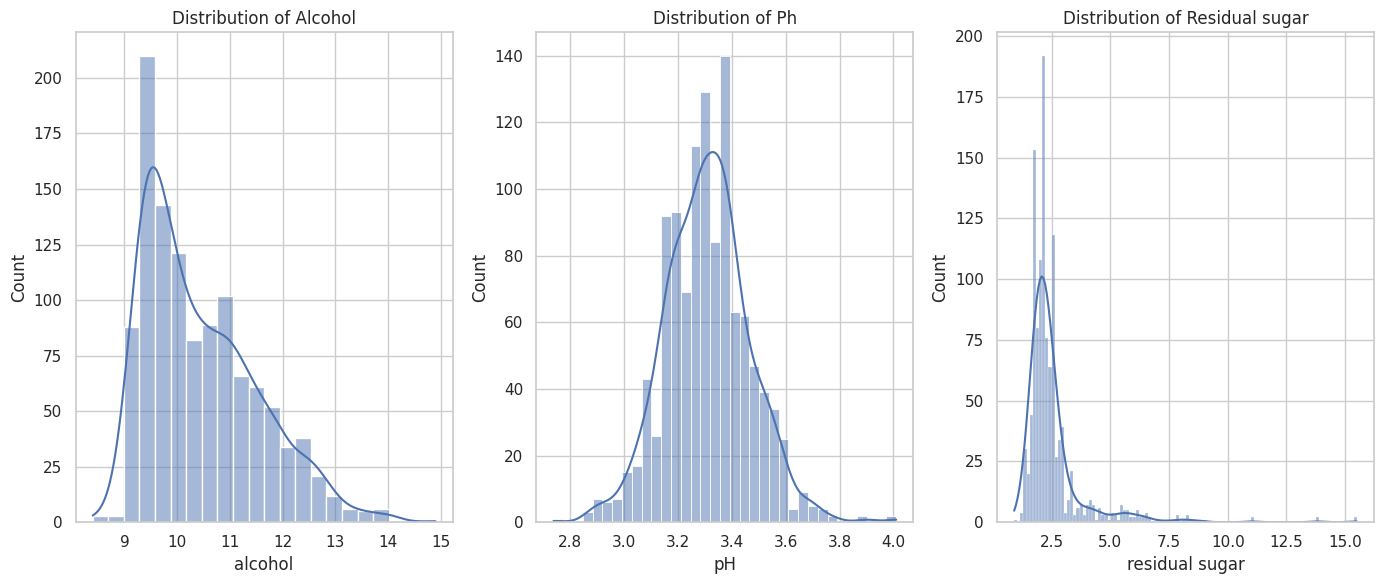

In [21]:
#Distribution Plots for Key Features (Alcohol, pH, etc.)
plt.figure(figsize=(14, 6))
for i, column in enumerate(['alcohol', 'pH', 'residual sugar'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column.capitalize()}')
plt.tight_layout()
plt.show()

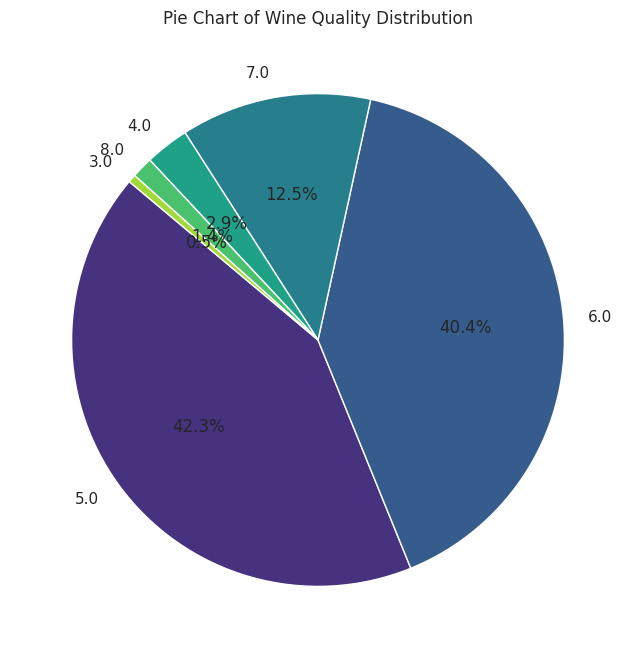

In [40]:
#Pie Chart of Quality Distribution
df = pd.DataFrame(df)
df.columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'Id']
quality_counts = df['quality'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(quality_counts)))
plt.title('Pie Chart of Wine Quality Distribution')
plt.show()